<a href="https://colab.research.google.com/github/Ajay07pandey/Retail-sale-prediction-of-a-drug-store./blob/main/Retail_sale_pridiction_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Retail sale pridiction of a drug store**



##### **Project Type**    - **Regression**
##### **Contribution**    - **Team**
##### **Team Member 1 - Shahrukh ahmed**
##### **Team Member 2 - Prasad Wagh** 
##### **Team Member 3 - Manjiri** 
##### **Team Member 4 - Ashi**
##### **Team Member 5 - Ajay pandey**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Rossmann operates over 3,000 drug stores in 7 European countries. Currently,
Rossmann store managers are tasked with predicting their daily sales for up
to six weeks in advance. Store sales are influenced by many factors, including
promotions, competition, school and state holidays, seasonality, and locality.
With thousands of individual managers predicting sales based on their unique
circumstances, the accuracy of results can be quite varied. You are provided
with historical sales data for 1,115 Rossmann stores. The task is to forecast the
"Sales" column for the test set. Note that some stores in the dataset were
temporarily closed for refurbishmen.**

# **Data fields** 


### **Rossmann Stores Data.csv** - historical data including Sales
### **store.csv**  - supplemental information about the stores

### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### **Id** - an Id that represents a store.
* #### **Store** - a unique Id for each store
* #### **Sales** - the turnover for any given day (this is what we are predicting)
* #### **Customers** - the number of customers on a given day
* #### **Open** - an indicator for whether the store was open: 0 = closed, 1 = open
* #### **StateHoliday** - indicates a state holiday. here we have given the dataset of europe so holidays are a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### **SchoolHoliday** - indicates the school holiday. 0 = no holiday, 1 = holiday
* #### **StoreType** - differentiates between 4 different store models: a , b, c, d (By the level of 
* #### **Assortment** - describes an assortment level: **a = basic, b = extra, c = extended**
* #### **CompetitionDistance** - distance in meters to the nearest competitor store
* #### **CompetitionOpenSince[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened
* #### **Promo** - indicates whether a store is running a promo on that day
* #### **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### **Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2
* #### **PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [412]:
# Import Libraries for visualisation 
import numpy as np
from numpy import math 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

#importing basic library for pridiction 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive 
drive.mount('/content/drive')

In [ ]:
# loading Rossman dataset
rm_df = pd.read_csv('/content/drive/MyDrive/Capstone project/Retail sales prediction (ML)/Rossmann Stores Data.csv')

In [ ]:
# loading Store dataset
store_df = pd.read_csv('/content/drive/MyDrive/Capstone project/Retail sales prediction (ML)/store.csv')

### Dataset First View

In [ ]:
# Dataset First Look
rm_df.head()

In [ ]:
store_df.head()

### Dataset Rows & Columns count

In [ ]:
# Rossmann Dataset Rows & Columns count
rm_df.shape

In [ ]:
#store rows and column count
store_df.shape

### Dataset Information

In [ ]:
# Dataset Info
rm_df.info()

In [ ]:
store_df.info()

In [ ]:
# Describe Rossman data set
rm_df.describe(include = 'all')

In [ ]:
# describe storedata set 
store_df.describe(include = 'all')

#### Duplicate Values

In [ ]:
store_df.duplicated().any()

In [ ]:
# Dataset Duplicate Value Count
rm_df.duplicated().sum()

In [ ]:
rm_df.duplicated().any()

In [ ]:
# Store duplicate values count
store_df.duplicated().sum()

Great!!! we don't have duplicate values in our data set

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

In [ ]:
store_df.isnull().any()

In [ ]:
rm_df.isnull().any()

In [ ]:
rm_df.isnull().sum()

In [ ]:
null = store_df.isnull().sum() 
null

## Visualization of nan values

We do visualization of missing values with the help of **Missingno library** which is specially designed for Nan values.

In [ ]:
# Visualization of missing values with the help of Bar plot
plt.figure(figsize=(15,8))
import missingno as msno
msno.bar(store_df, color='green')

For more clear understanding now we draw **Heat Map**

In [ ]:
plt.figure(figsize=(15,8))
msno.heatmap(store_df, cmap='YlGnBu')

In [ ]:
## Now checking Nan values are present or not.
store_df.isna().sum()

Now we dont nave Nan values so we can proceed 

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
rm_df.columns


In [437]:
# Columns in store data frame
store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [438]:
# Dataset Describe
rm_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [439]:
# store data set 
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [440]:
from scipy.stats.morestats import unique
# checking for unique values in Rosseman data set.
list_of_variables = rm_df.columns.to_list()

# Lets create a function to check unique values.
for i in list_of_variables :
  print('The unique values in the', i , 'are' , rm_df[i].unique())


The unique values in the Store are [   1    2    3 ... 1113 1114 1115]
The unique values in the DayOfWeek are [5 4 3 2 1 7 6]
The unique values in the Date are ['2015-07-31' '2015-07-30' '2015-07-29' '2015-07-28' '2015-07-27'
 '2015-07-26' '2015-07-25' '2015-07-24' '2015-07-23' '2015-07-22'
 '2015-07-21' '2015-07-20' '2015-07-19' '2015-07-18' '2015-07-17'
 '2015-07-16' '2015-07-15' '2015-07-14' '2015-07-13' '2015-07-12'
 '2015-07-11' '2015-07-10' '2015-07-09' '2015-07-08' '2015-07-07'
 '2015-07-06' '2015-07-05' '2015-07-04' '2015-07-03' '2015-07-02'
 '2015-07-01' '2015-06-30' '2015-06-29' '2015-06-28' '2015-06-27'
 '2015-06-26' '2015-06-25' '2015-06-24' '2015-06-23' '2015-06-22'
 '2015-06-21' '2015-06-20' '2015-06-19' '2015-06-18' '2015-06-17'
 '2015-06-16' '2015-06-15' '2015-06-14' '2015-06-13' '2015-06-12'
 '2015-06-11' '2015-06-10' '2015-06-09' '2015-06-08' '2015-06-07'
 '2015-06-06' '2015-06-05' '2015-06-04' '2015-06-03' '2015-06-02'
 '2015-06-01' '2015-05-31' '2015-05-30' '2015-05

In [441]:
variables = store_df.columns.to_list()

# Lets create a function to check unique values.
for i in variables :
  print('The unique values in the', i , 'are' , store_df[i].unique())

The unique values in the Store are [   1    2    3 ... 1113 1114 1115]
The unique values in the StoreType are ['c' 'a' 'd' 'b']
The unique values in the Assortment are ['a' 'c' 'b']
The unique values in the CompetitionDistance are [1.270e+03 5.700e+02 1.413e+04 6.200e+02 2.991e+04 3.100e+02 2.400e+04
 7.520e+03 2.030e+03 3.160e+03 9.600e+02 1.070e+03 1.300e+03 4.110e+03
 3.270e+03 5.000e+01 1.384e+04 3.240e+03 2.340e+03 5.500e+02 1.040e+03
 4.060e+03 4.590e+03 4.300e+02 2.300e+03 6.000e+01 1.200e+03 2.170e+03
 4.000e+01 9.800e+03 2.910e+03 1.320e+03 2.240e+03 7.660e+03 5.400e+02
 4.230e+03 1.090e+03 2.600e+02 1.800e+02 1.180e+03 2.900e+02 4.880e+03
 9.710e+03 2.700e+02 1.060e+03 1.801e+04 6.260e+03 1.057e+04 4.500e+02
 3.036e+04 7.170e+03 7.200e+02 6.620e+03 4.200e+02 7.340e+03 2.840e+03
 5.540e+03 3.500e+02 2.050e+03 3.700e+03 2.256e+04 4.100e+02 2.500e+02
 1.130e+03 4.840e+03 1.750e+04 2.200e+03 1.650e+03 3.300e+02 2.244e+04
 1.996e+04 3.510e+03 3.320e+03 7.910e+03 2.370e+03 2.239e+0

In [442]:
# Check Unique Values for each variable.

## 3. ***Data Wrangling***

Text(0.5, 1.0, 'Distribution plot')

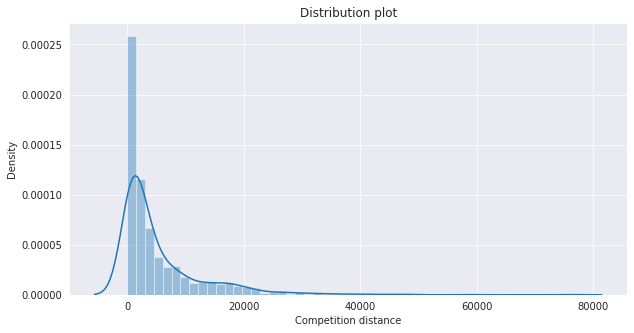

In [443]:
plt.figure(figsize=(10,5))
sns.distplot(x=store_df['CompetitionDistance'])
plt.xlabel('Competition distance')
plt.title('Distribution plot')

Here we can see that the distribution is right skewed so we can take the median value to replace null values of competition distance.

In [444]:
# code for replacing Nan values in CompetitionDistance with mode.
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

Text(0.5, 0, 'Competion open since month')

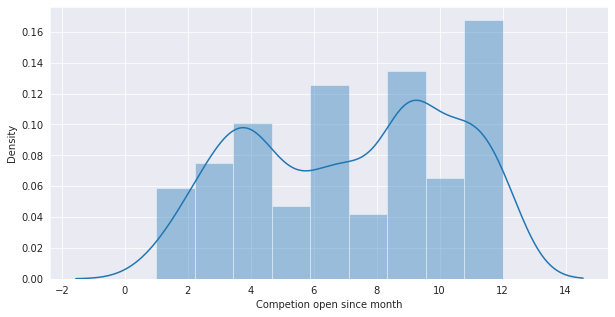

In [445]:
# Visualizing the missing values
plt.figure(figsize=(10,5))
sns.distplot(x=store_df['CompetitionOpenSinceMonth'])
plt.xlabel('Competion open since month')

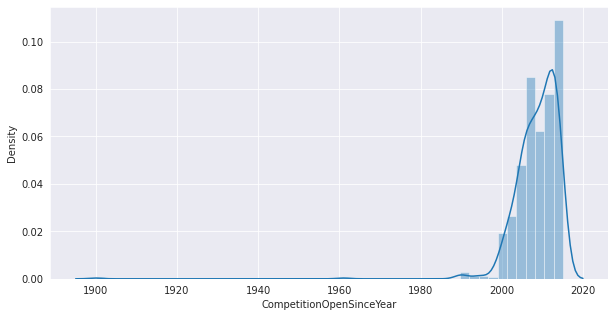

In [446]:
plt.figure(figsize=(10,5))
sns.distplot(store_df['CompetitionOpenSinceYear'])

In [447]:
from statistics import mode
# By seeing the graph we can say that we can replace the null values with mode for competition open since Year/Month.
store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)

# same for the competition open since month
store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [448]:
# Replacing Nan values with 0 in Promo2SinceWeek
store_df['Promo2SinceWeek'].fillna(store_df['Promo2SinceWeek'].fillna(0) , inplace = True)

# Replacing Nan values with 0 in Promo2SinceYear
store_df['Promo2SinceYear'].fillna(store_df['Promo2SinceYear'].fillna(0) ,inplace = True)

# Replacing Nan values with 0 in PromoInterval
store_df['PromoInterval'].fillna(store_df['PromoInterval'].fillna(0) ,inplace = True)

In [449]:
## Now checking Nan values are present or not.
store_df.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [450]:
# Write your code to make your dataset analysis ready.
# Value_counts of StateHoliday Column
rm_df.StateHoliday.value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [451]:
# Value_counts of StateHoliday Column
rm_df.value_counts()

Store  DayOfWeek  Date        Sales  Customers  Open  Promo  StateHoliday  SchoolHoliday
1      1          2013-01-07  7176   785        1     1      0             1                1
745    5          2015-06-05  7622   711        1     1      0             0                1
                  2015-03-06  7667   738        1     1      0             0                1
                  2015-03-13  6268   668        1     0      0             0                1
                  2015-03-20  7857   725        1     1      0             0                1
                                                                                           ..
372    7          2013-03-03  0      0          0     0      0             0                1
                  2013-03-10  0      0          0     0      0             0                1
                  2013-03-17  0      0          0     0      0             0                1
                  2013-03-24  0      0          0     0      0   

In [452]:
rm_df['Date']=pd.to_datetime(rm_df['Date'])
rm_df['Year'] = rm_df['Date'].apply(lambda x: x.year)
rm_df['Month'] = rm_df['Date'].apply(lambda x: x.month)
rm_df['Day'] = rm_df['Date'].apply(lambda x: x.day)
rm_df['WeekOfYear'] = rm_df['Date'].apply(lambda x: x.weekofyear)

In [453]:
rm_df.sort_values(by=['Date','Store'],inplace=True,ascending=[False,True])

In [454]:
rm_df.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
398000,959,6,2014-07-12,3931,416,1,0,0,0,2014,7,12,28
263454,1068,3,2014-12-03,5782,366,1,1,0,0,2014,12,3,49
286675,886,6,2014-11-08,4334,432,1,0,0,0,2014,11,8,45
875895,291,2,2013-05-07,7268,830,1,0,0,0,2013,5,7,19
629894,705,6,2013-12-14,5354,649,1,0,0,0,2013,12,14,50


Let's merge the two given datasets .

In [455]:
# Merging the two dataset 'Rossmann store dataset' and 'Store dataset'
df=rm_df.merge(store_df,how='inner',on='Store')

In [456]:
df.drop('Date',axis=1, inplace= True) 

In [457]:
df["CompetitionDistance"]= df["CompetitionDistance"].astype(int)
df["CompetitionOpenSinceMonth"]= df["CompetitionOpenSinceMonth"].astype(int)
df["CompetitionOpenSinceYear"]= df["CompetitionOpenSinceYear"].astype(int)
df["Promo2SinceWeek"]= df["Promo2SinceWeek"].astype(int)
df["Promo2SinceYear"]= df["Promo2SinceYear"].astype(int)
df["Sales"]= df["Sales"].astype(int)
df["Customers"]= df["Customers"].astype(int)

In [458]:
df[df['Promo2'] != 0]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
942,2,5,6064,625,1,1,0,1,2015,7,31,31,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
943,2,4,5567,601,1,1,0,1,2015,7,30,31,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
944,2,3,6402,727,1,1,0,1,2015,7,29,31,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
945,2,2,5671,646,1,1,0,1,2015,7,28,31,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
946,2,1,6627,638,1,1,0,1,2015,7,27,31,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,4771,339,1,0,0,1,2013,1,5,1,d,c,5350,9,2013,1,22,2012,"Mar,Jun,Sept,Dec"
1017205,1115,5,4540,326,1,0,0,1,2013,1,4,1,d,c,5350,9,2013,1,22,2012,"Mar,Jun,Sept,Dec"
1017206,1115,4,4297,300,1,0,0,1,2013,1,3,1,d,c,5350,9,2013,1,22,2012,"Mar,Jun,Sept,Dec"
1017207,1115,3,3697,305,1,0,0,1,2013,1,2,1,d,c,5350,9,2013,1,22,2012,"Mar,Jun,Sept,Dec"


In [459]:
# creating new columns from existing coulmns
df["PromoOpen"] = (12* (df["Year"]-df["Promo2SinceYear"])) + df["Month"]-((df["Promo2SinceWeek"]/4))

In [460]:

# Checking PromoOpen Negative figures 
df[df["PromoOpen"]<0].head(10)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,PromoOpen
17926,20,1,9229,954,1,1,0,0,2014,6,30,27,d,a,2340,5,2009,1,40,2014,"Jan,Apr,Jul,Oct",-4.0
17927,20,7,0,0,0,0,0,0,2014,6,29,26,d,a,2340,5,2009,1,40,2014,"Jan,Apr,Jul,Oct",-4.0
17928,20,6,5572,566,1,0,0,0,2014,6,28,26,d,a,2340,5,2009,1,40,2014,"Jan,Apr,Jul,Oct",-4.0
17929,20,5,7149,839,1,0,0,0,2014,6,27,26,d,a,2340,5,2009,1,40,2014,"Jan,Apr,Jul,Oct",-4.0
17930,20,4,8118,997,1,0,0,0,2014,6,26,26,d,a,2340,5,2009,1,40,2014,"Jan,Apr,Jul,Oct",-4.0
17931,20,3,7212,911,1,0,0,0,2014,6,25,26,d,a,2340,5,2009,1,40,2014,"Jan,Apr,Jul,Oct",-4.0
17932,20,2,7104,854,1,0,0,0,2014,6,24,26,d,a,2340,5,2009,1,40,2014,"Jan,Apr,Jul,Oct",-4.0
17933,20,1,7856,946,1,0,0,0,2014,6,23,26,d,a,2340,5,2009,1,40,2014,"Jan,Apr,Jul,Oct",-4.0
17934,20,7,0,0,0,0,0,0,2014,6,22,25,d,a,2340,5,2009,1,40,2014,"Jan,Apr,Jul,Oct",-4.0
17935,20,6,4862,499,1,0,0,0,2014,6,21,25,d,a,2340,5,2009,1,40,2014,"Jan,Apr,Jul,Oct",-4.0


These negative values arise because these stores have not started promo yet

In [461]:
# Replacing Those Negative Figures With Zero 
df.loc[df["PromoOpen"]<0, "PromoOpen" ] = 0

In [462]:
# Creating New Column From Existing Columns
df["CompetitionOpen"] = (12* (df["Year"]-df["CompetitionOpenSinceYear"])) + (df["Month"]-df["CompetitionOpenSinceMonth"])

Here we have created new column called "CompetitionOpen" from existing columns to measure the period(in months) from whem the nearest competition has opened

In [463]:
# Checking CompetitionOpen Negative figures 
df[df["CompetitionOpen"]<0].head(10)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,PromoOpen,CompetitionOpen
3890,5,2,7692,659,1,1,0,0,2015,3,31,14,a,a,29910,4,2015,0,0,0,0,24183.0,-1
3891,5,1,8847,770,1,1,0,0,2015,3,30,14,a,a,29910,4,2015,0,0,0,0,24183.0,-1
3892,5,7,0,0,0,0,0,0,2015,3,29,13,a,a,29910,4,2015,0,0,0,0,24183.0,-1
3893,5,6,2038,219,1,0,0,0,2015,3,28,13,a,a,29910,4,2015,0,0,0,0,24183.0,-1
3894,5,5,4181,499,1,0,0,0,2015,3,27,13,a,a,29910,4,2015,0,0,0,0,24183.0,-1
3895,5,4,3711,460,1,0,0,0,2015,3,26,13,a,a,29910,4,2015,0,0,0,0,24183.0,-1
3896,5,3,4325,613,1,0,0,0,2015,3,25,13,a,a,29910,4,2015,0,0,0,0,24183.0,-1
3897,5,2,4073,537,1,0,0,0,2015,3,24,13,a,a,29910,4,2015,0,0,0,0,24183.0,-1
3898,5,1,4028,540,1,0,0,0,2015,3,23,13,a,a,29910,4,2015,0,0,0,0,24183.0,-1
3899,5,7,0,0,0,0,0,0,2015,3,22,12,a,a,29910,4,2015,0,0,0,0,24183.0,-1


Here CompetitionOpen column has figures in negative which indicates that the store do not have any competition. So we have replace those negative figures with zero

In [464]:
# now we can remove the CompetitionOpenSinceMonth	CompetitionOpenSinceYear	Promo2	Promo2SinceWeek	Promo2SinceYear
df.drop(['CompetitionOpenSinceMonth',	'CompetitionOpenSinceYear',	'Promo2',	'Promo2SinceWeek'	,'Promo2SinceYear'], axis= 1, inplace = True)

In [346]:
df['PromoInterval']

0                         0
1                         0
2                         0
3                         0
4                         0
                 ...       
1017204    Mar,Jun,Sept,Dec
1017205    Mar,Jun,Sept,Dec
1017206    Mar,Jun,Sept,Dec
1017207    Mar,Jun,Sept,Dec
1017208    Mar,Jun,Sept,Dec
Name: PromoInterval, Length: 1017209, dtype: object

In [465]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Store                1017209 non-null  int64  
 1   DayOfWeek            1017209 non-null  int64  
 2   Sales                1017209 non-null  int64  
 3   Customers            1017209 non-null  int64  
 4   Open                 1017209 non-null  int64  
 5   Promo                1017209 non-null  int64  
 6   StateHoliday         1017209 non-null  object 
 7   SchoolHoliday        1017209 non-null  int64  
 8   Year                 1017209 non-null  int64  
 9   Month                1017209 non-null  int64  
 10  Day                  1017209 non-null  int64  
 11  WeekOfYear           1017209 non-null  int64  
 12  StoreType            1017209 non-null  object 
 13  Assortment           1017209 non-null  object 
 14  CompetitionDistance  1017209 non-null  int64  
 15

In [466]:
df['PromoOpen'] = df['PromoOpen'].astype(int)

In [347]:
# first view of our df dataset
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,PromoInterval,PromoOpen,CompetitionOpen
0,1,5,5263,555,1,1,0,1,2015,7,31,31,c,a,1270,0,24187.0,82
1,1,4,5020,546,1,1,0,1,2015,7,30,31,c,a,1270,0,24187.0,82
2,1,3,4782,523,1,1,0,1,2015,7,29,31,c,a,1270,0,24187.0,82
3,1,2,5011,560,1,1,0,1,2015,7,28,31,c,a,1270,0,24187.0,82
4,1,1,6102,612,1,1,0,1,2015,7,27,31,c,a,1270,0,24187.0,82


In [348]:
df.isnull().any()

Store                  False
DayOfWeek              False
Sales                  False
Customers              False
Open                   False
Promo                  False
StateHoliday           False
SchoolHoliday          False
Year                   False
Month                  False
Day                    False
WeekOfYear             False
StoreType              False
Assortment             False
CompetitionDistance    False
PromoInterval          False
PromoOpen              False
CompetitionOpen        False
dtype: bool

Hence in df data set no null values are there.

In [349]:
# check for duplicates in df df 
df.duplicated().any()

False

In [350]:
# check shape of df df
df.shape

(1017209, 18)

In [467]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   Store                1017209 non-null  int64 
 1   DayOfWeek            1017209 non-null  int64 
 2   Sales                1017209 non-null  int64 
 3   Customers            1017209 non-null  int64 
 4   Open                 1017209 non-null  int64 
 5   Promo                1017209 non-null  int64 
 6   StateHoliday         1017209 non-null  object
 7   SchoolHoliday        1017209 non-null  int64 
 8   Year                 1017209 non-null  int64 
 9   Month                1017209 non-null  int64 
 10  Day                  1017209 non-null  int64 
 11  WeekOfYear           1017209 non-null  int64 
 12  StoreType            1017209 non-null  object
 13  Assortment           1017209 non-null  object
 14  CompetitionDistance  1017209 non-null  int64 
 15  PromoInterval  

In [352]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,CompetitionDistance,PromoOpen,CompetitionOpen
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,2.013832e+03,5.846762e+00,1.570279e+01,2.361551e+01,5.422021e+03,1.208544e+04,4.332400e+01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.773960e-01,3.326097e+00,8.787638e+00,1.443338e+01,7.706918e+03,1.207292e+04,6.492352e+01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+01,0.000000e+00,-3.100000e+01
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00,1.100000e+01,7.100000e+02,2.500000e+01,5.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01,2.200000e+01,2.325000e+03,6.975000e+01,2.000000e+01
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,2.014000e+03,8.000000e+00,2.300000e+01,3.500000e+01,6.880000e+03,2.417200e+04,7.300000e+01
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.015000e+03,1.200000e+01,3.100000e+01,5.200000e+01,7.586000e+04,2.418700e+04,1.386000e+03


Hence we can conclude that maximum number of sales is in december month, this is because of the christmas celebration and for the upcoming new year shopping.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## Univeriate Analysis

#### Chart - 1

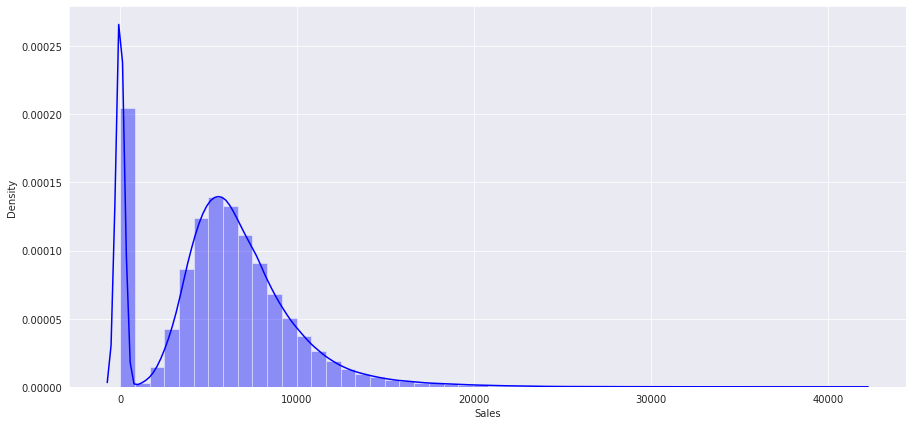

In [353]:
plt.figure(figsize = (15,7))
sns.distplot (df ['Sales'], color='blue')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

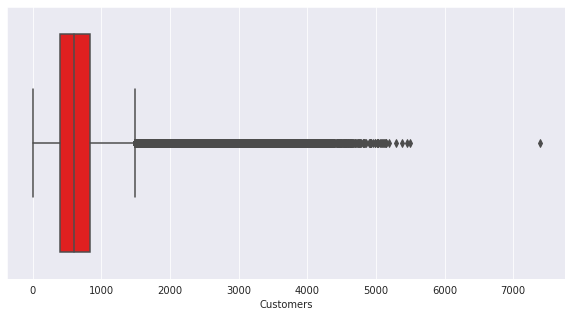

In [354]:
# Chart - 2 visualization code
plt.figure(figsize=(10,5))
sns.boxplot(df['Customers'], color = 'red' )

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [355]:
# Chart - 3 visualization code

# plt.figure(figsize=(10,7))
# sns.distplot(df[''],color='purple')
# plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

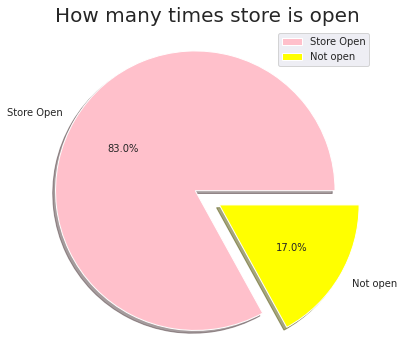

In [356]:
labels = 'Store Open' , 'Not open'
sizes = df.Open.value_counts()
colors = ['pink', 'yellow']
explode = (0.2, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title("How many times store is open",fontsize=20)
plt.legend( labels, loc="best")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

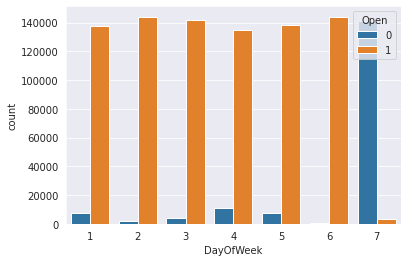

In [357]:
# Chart - 5 visualization code
sns.countplot(x='DayOfWeek',hue='Open', data = df)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

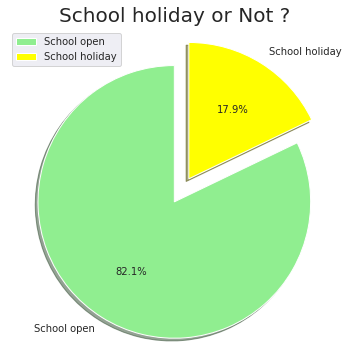

In [358]:
# Chart - 6 visualization code
labels = 'School open' , 'School holiday'
sizes = df.SchoolHoliday.value_counts()
colors = ['lightgreen', 'yellow']
explode = (0.2, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
          autopct='%1.1f%%', shadow=True, startangle=90)
plt.legend( labels, loc="best")
plt.axis('equal')
plt.title("School holiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

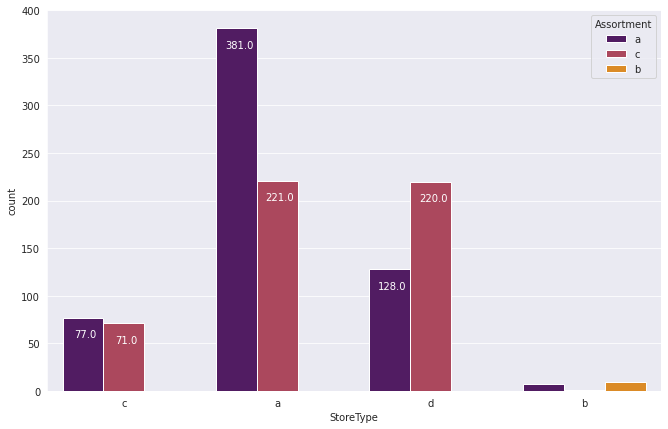

In [359]:
# Chart - 7 visualization code
#checking stores with their assortment type 
sns.set_style("darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
store_type=sns.countplot(x='StoreType',hue='Assortment', data=store_df,palette="inferno")

for p in store_type.patches:
    store_type.annotate(f'\n{p.get_height()}', (p.get_x()+0.15, p.get_height()),ha='center', va='top', color='white', size=10)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

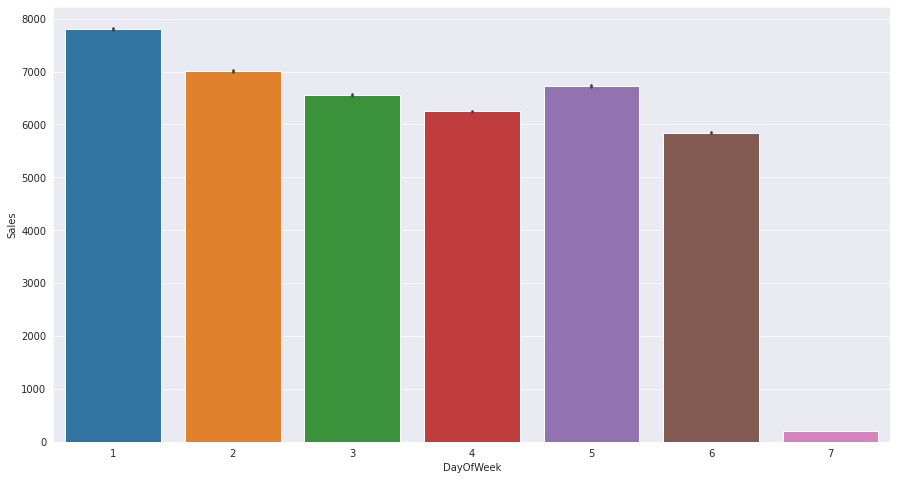

In [360]:
# Chart - 8 visualization code
plt.figure(figsize=(15,8))
sns.barplot(x='DayOfWeek', y='Sales' ,data=df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

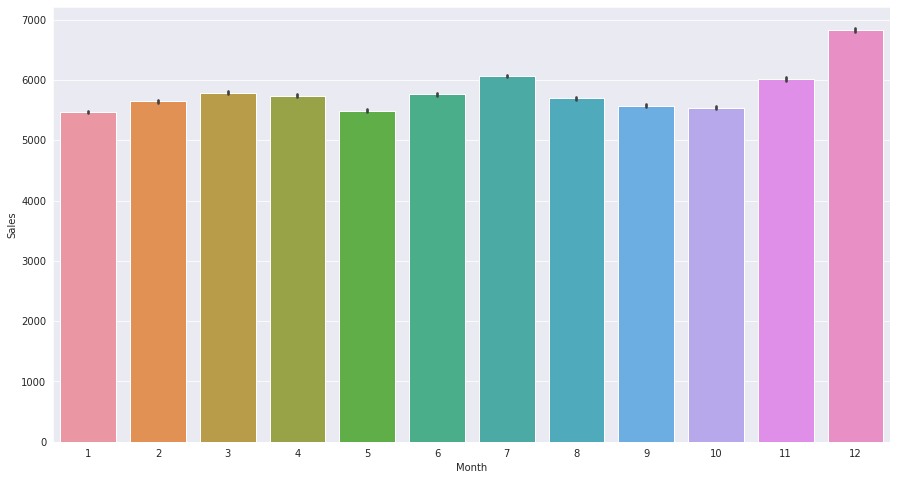

In [361]:
# Chart - 9 visualization code
plt.figure(figsize=(15,8))
sns.barplot(x='Month', y='Sales' ,data=df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

(4000.0, 6188.793676453169)

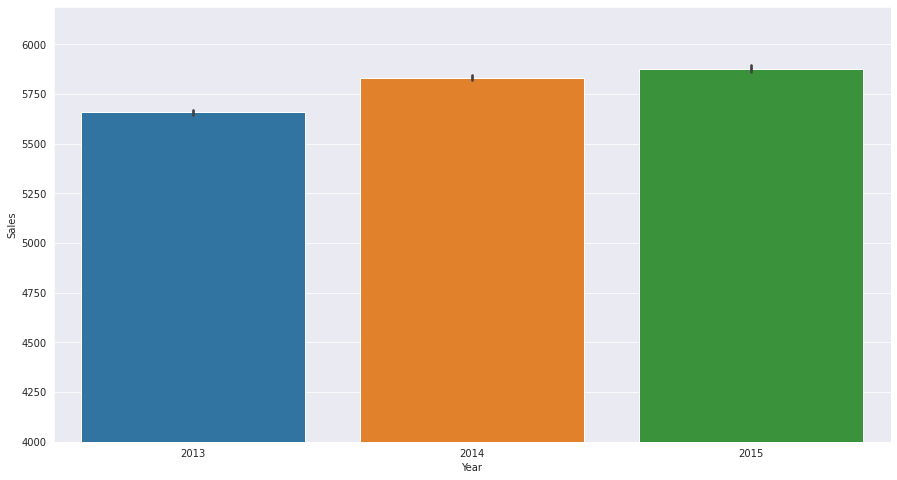

In [362]:
# Chart - 10 visualization code
plt.figure(figsize=(15,8))
sns.barplot(x='Year', y='Sales' ,data=df, )
plt.ylim(4000,)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

Text(0.5, 1.0, 'Boxplot For Sales Values')

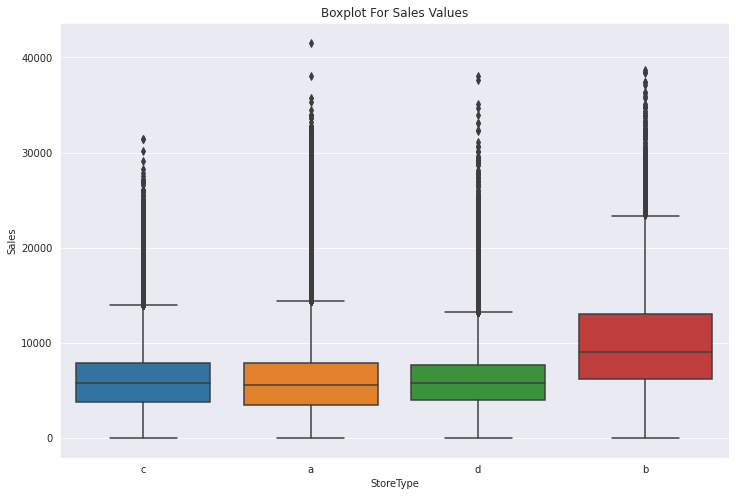

In [363]:
# Chart - 11 visualization code
plt.figure(figsize=(12,8))
sns.boxplot(x="StoreType", y="Sales", data=df)
plt.title('Boxplot For Sales Values')

Text(0.5, 1.0, 'Boxplot For Sales  Values on the basis of Assortment Level')

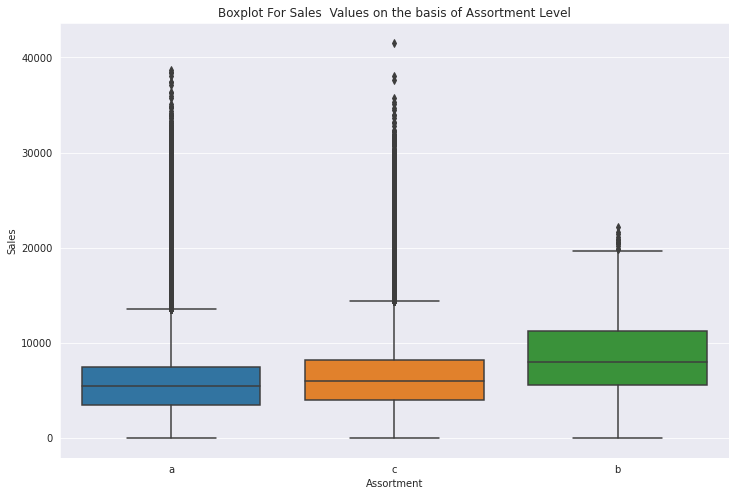

In [364]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Assortment", y="Sales", data=df)
plt.title('Boxplot For Sales  Values on the basis of Assortment Level')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [365]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [366]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [367]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [368]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## Bivariate analysis.

### Chart 1

(5000.0, 7000.0)

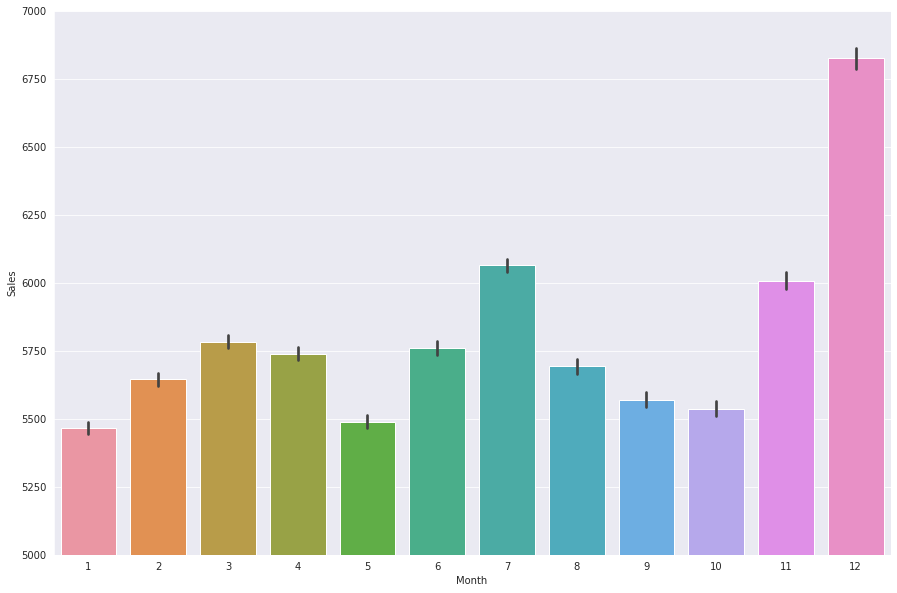

In [369]:
plt.figure(figsize=(15,10))
sns.barplot(x='Month' , y='Sales' , data = df )
plt.ylim(5000,7000)

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain df conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [370]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [371]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [372]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [373]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

Store                  0
DayOfWeek              0
Sales                  0
Customers              0
Open                   0
Promo                  0
StateHoliday           0
SchoolHoliday          0
Year                   0
Month                  0
Day                    0
WeekOfYear             0
StoreType              0
Assortment             0
CompetitionDistance    0
PromoInterval          0
PromoOpen              0
CompetitionOpen        0
dtype: int64

In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Store                1017209 non-null  int64  
 1   DayOfWeek            1017209 non-null  int64  
 2   Sales                1017209 non-null  int64  
 3   Customers            1017209 non-null  int64  
 4   Open                 1017209 non-null  int64  
 5   Promo                1017209 non-null  int64  
 6   StateHoliday         1017209 non-null  object 
 7   SchoolHoliday        1017209 non-null  int64  
 8   Year                 1017209 non-null  int64  
 9   Month                1017209 non-null  int64  
 10  Day                  1017209 non-null  int64  
 11  WeekOfYear           1017209 non-null  int64  
 12  StoreType            1017209 non-null  object 
 13  Assortment           1017209 non-null  object 
 14  CompetitionDistance  1017209 non-null  int64  
 15

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

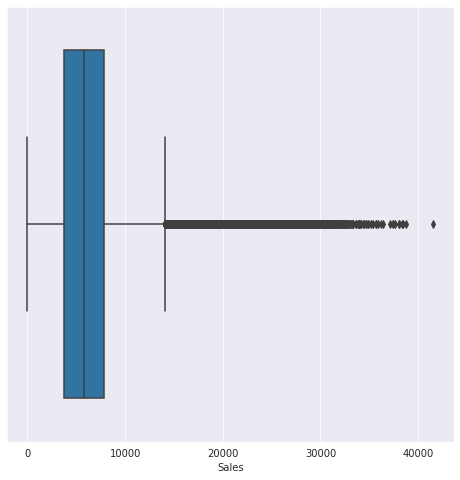

In [375]:
# Handling Outliers & Outlier treatments
fig, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(df['Sales'])
     

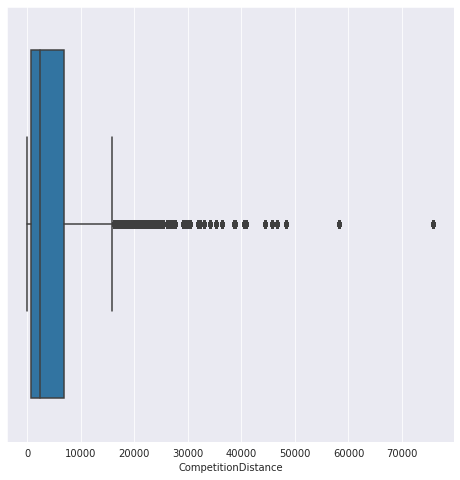

In [376]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(df['CompetitionDistance'])

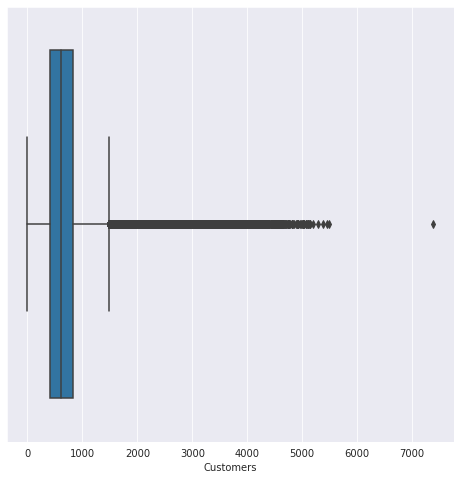

In [377]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(df['Customers'])

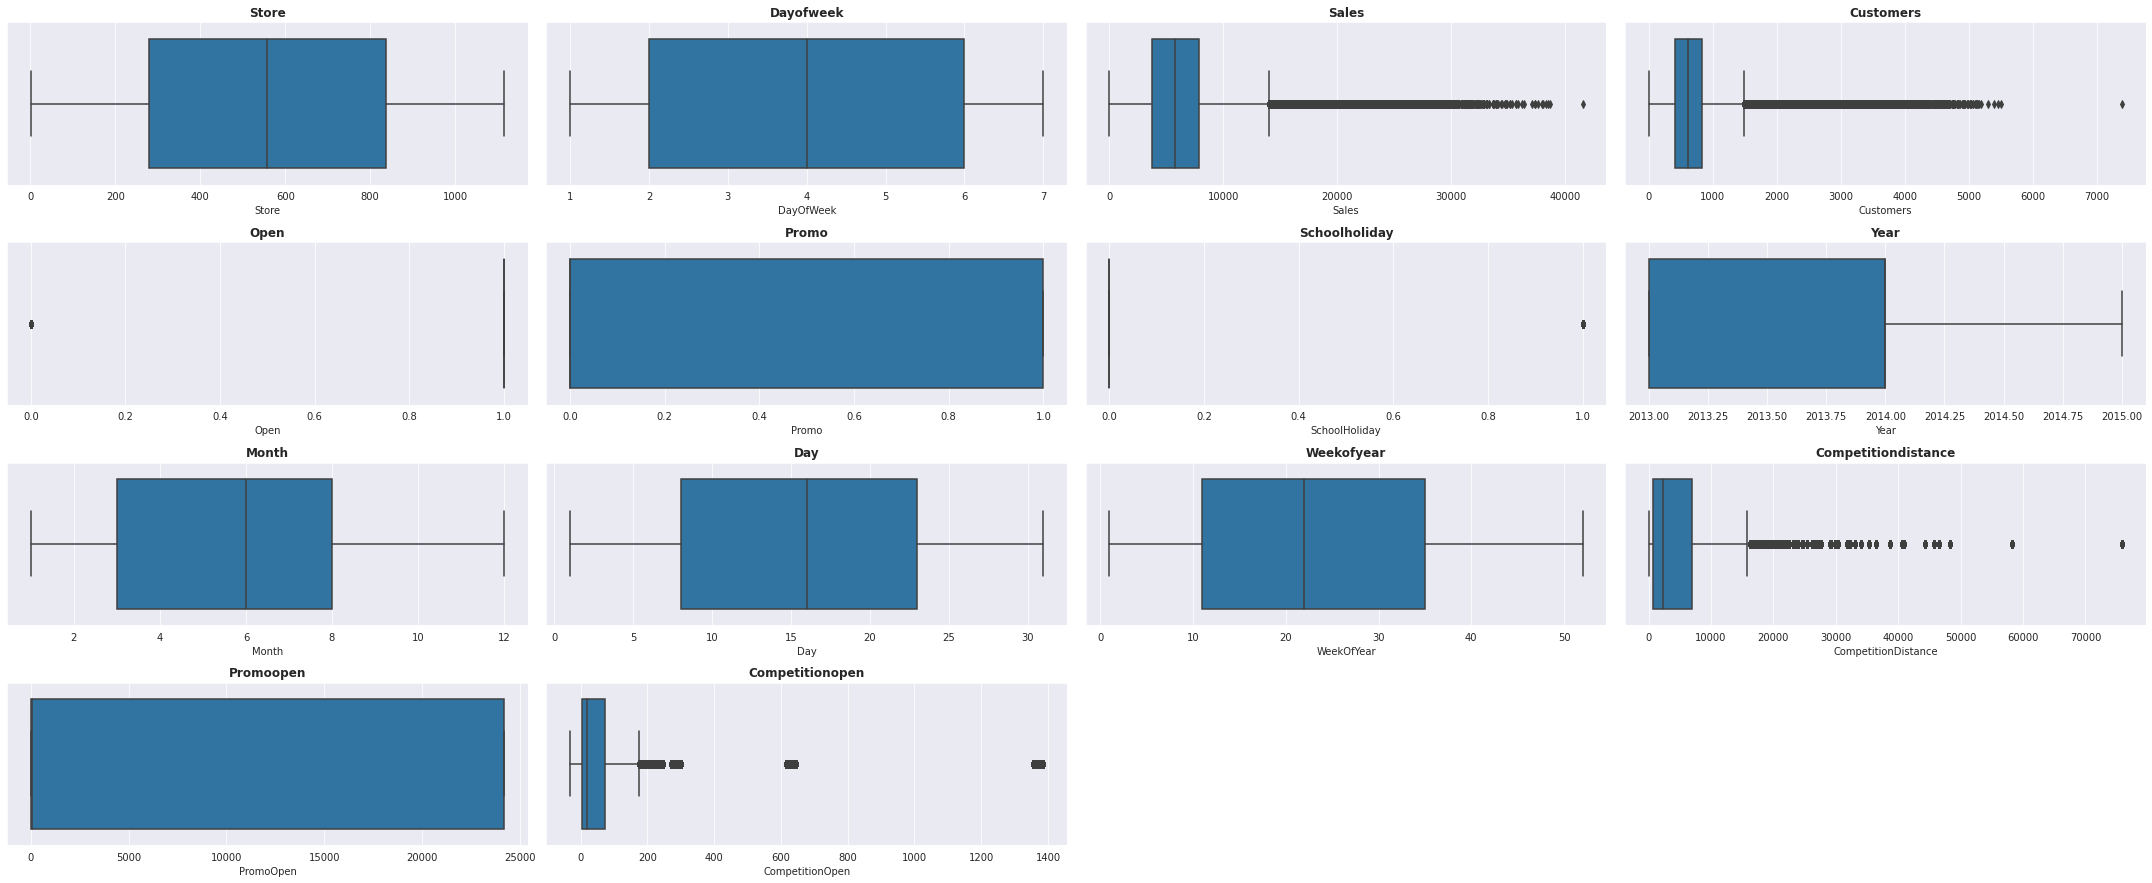

In [378]:
# Handling Outliers & Outlier treatments
plt.figure(figsize=(30,15))
for n,column in enumerate(df.describe().columns):
  plt.subplot(5, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

Here we can observe that there are outliers in various features like:

1. Sales
2. Customers
3. Competition distance
4. Competitionopen

In [379]:
outliners = ['Sales', 'Customers', 'CompetitionDistance', 'CompetitionOpen' ]

In [380]:
# Defining the function that treats outliers with the IQR technique
def treat_outliers_iqr(data):
    # Calculate the first and third quartiles
    q1, q3 = np.percentile(data, [25, 75])
    
    # Calculate the interquartile range (IQR)
    iqr = q3 - q1
    
    # Identify the outliers
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    
    # Print the outliers
    print("Outliers:", outliers)
    
    # Treat the outliers (e.g., replace with the nearest quartile value)
    treated_data = [q1 if x < lower_bound else q3 if x > upper_bound else x for x in data]
    treated_data_int = [int(absolute) for absolute in treated_data]
    
    return treated_data

In [381]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Store                1017209 non-null  int64  
 1   DayOfWeek            1017209 non-null  int64  
 2   Sales                1017209 non-null  int64  
 3   Customers            1017209 non-null  int64  
 4   Open                 1017209 non-null  int64  
 5   Promo                1017209 non-null  int64  
 6   StateHoliday         1017209 non-null  object 
 7   SchoolHoliday        1017209 non-null  int64  
 8   Year                 1017209 non-null  int64  
 9   Month                1017209 non-null  int64  
 10  Day                  1017209 non-null  int64  
 11  WeekOfYear           1017209 non-null  int64  
 12  StoreType            1017209 non-null  object 
 13  Assortment           1017209 non-null  object 
 14  CompetitionDistance  1017209 non-null  int64  
 15

In [470]:
#Passing all the feature one by one from the list of continous_value_feature in our above defined function for outlier treatment
for feature in outliners:
  df[feature]= treat_outliers_iqr(df[feature])

Outliers: []
Outliers: []
Outliers: []
Outliers: []


What all outlier treatment techniques have you used and why did you use those techniques?
we have used the IQR method to do the outlier treatment, because there where too many outliers present, for which log transformation is not an appropriate method

The interquartile range (IQR) is a measure of dispersion that is used to identify and handle outliers in a dataset. It is defined as the difference between the 75th percentile and the 25th percentile of the data, and it is a robust measure of dispersion that is not affected by outliers.

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [471]:
df_new = df.copy()

In [472]:
categorical_col=['StateHoliday','StoreType','Assortment','PromoInterval']

In [473]:
# checking the unique counts of object dype column which is essential to determine the type of encoding to be use in various column
for unique in categorical_col:
  print(f"{unique}: ")
  print(f"\tThe unique values are: {df_new[unique].unique()}")
  print(f"\tTotal number of unique values are: {df_new[unique].nunique()}")

StateHoliday: 
	The unique values are: ['0' 'a' 'b' 'c' 0]
	Total number of unique values are: 5
StoreType: 
	The unique values are: ['c' 'a' 'd' 'b']
	Total number of unique values are: 4
Assortment: 
	The unique values are: ['a' 'c' 'b']
	Total number of unique values are: 3
PromoInterval: 
	The unique values are: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
	Total number of unique values are: 4


In [474]:
df_new=pd.get_dummies(df,columns=['StoreType','Assortment','PromoInterval','StateHoliday'],dtype=int)

# code to see all the features
pd.set_option('display.max_columns', None)

# Let's see first five observations of our dataset
df_new.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,CompetitionDistance,PromoOpen,CompetitionOpen,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",StateHoliday_0,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,5263.0,555.0,1,1,1,2015,7,31,31,1270.0,24187,82.0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0
1,1,4,5020.0,546.0,1,1,1,2015,7,30,31,1270.0,24187,82.0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0
2,1,3,4782.0,523.0,1,1,1,2015,7,29,31,1270.0,24187,82.0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0
3,1,2,5011.0,560.0,1,1,1,2015,7,28,31,1270.0,24187,82.0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0
4,1,1,6102.0,612.0,1,1,1,2015,7,27,31,1270.0,24187,82.0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0


In [475]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 30 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Store                           1017209 non-null  int64  
 1   DayOfWeek                       1017209 non-null  int64  
 2   Sales                           1017209 non-null  float64
 3   Customers                       1017209 non-null  float64
 4   Open                            1017209 non-null  int64  
 5   Promo                           1017209 non-null  int64  
 6   SchoolHoliday                   1017209 non-null  int64  
 7   Year                            1017209 non-null  int64  
 8   Month                           1017209 non-null  int64  
 9   Day                             1017209 non-null  int64  
 10  WeekOfYear                      1017209 non-null  int64  
 11  CompetitionDistance             1017209 non-null  float64
 12  

In [388]:
# One hot encoding
# merge_rossman_store_df = pd.get_dummies(merge_rossman_store_df, columns=["StateHoliday"],drop_first=True)

In [476]:
df_new.drop(['PromoInterval_0','StateHoliday_0'],axis=1,inplace =True)

In [477]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 27 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Store                           1017209 non-null  int64  
 1   DayOfWeek                       1017209 non-null  int64  
 2   Sales                           1017209 non-null  float64
 3   Customers                       1017209 non-null  float64
 4   Open                            1017209 non-null  int64  
 5   Promo                           1017209 non-null  int64  
 6   SchoolHoliday                   1017209 non-null  int64  
 7   Year                            1017209 non-null  int64  
 8   Month                           1017209 non-null  int64  
 9   Day                             1017209 non-null  int64  
 10  WeekOfYear                      1017209 non-null  int64  
 11  CompetitionDistance             1017209 non-null  float64
 12  

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [391]:
# Expand Contraction

#### 2. Lower Casing

In [392]:
# Lower Casing

#### 3. Removing Punctuations

In [393]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [394]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [395]:
# Remove Stopwords

In [396]:
# Remove White spaces

#### 6. Rephrase Text

In [397]:
# Rephrase Text

#### 7. Tokenization

In [398]:
# Tokenization

#### 8. Text Normalization

In [399]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [400]:
# POS Taging

#### 10. Text Vectorization

In [401]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [402]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 27 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Store                           1017209 non-null  int64  
 1   DayOfWeek                       1017209 non-null  int64  
 2   Sales                           1017209 non-null  float64
 3   Customers                       1017209 non-null  float64
 4   Open                            1017209 non-null  int64  
 5   Promo                           1017209 non-null  int64  
 6   SchoolHoliday                   1017209 non-null  int64  
 7   Year                            1017209 non-null  int64  
 8   Month                           1017209 non-null  int64  
 9   Day                             1017209 non-null  int64  
 10  WeekOfYear                      1017209 non-null  int64  
 11  CompetitionDistance             1017209 non-null  float64
 12  

In [403]:
# Manipulate Features to minimize feature correlation and create new features



**we have dropped non unique values in df_new(Stateholiday,Promointerval)**

#### 2. Feature Selection

In [404]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 27 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Store                           1017209 non-null  int64  
 1   DayOfWeek                       1017209 non-null  int64  
 2   Sales                           1017209 non-null  float64
 3   Customers                       1017209 non-null  float64
 4   Open                            1017209 non-null  int64  
 5   Promo                           1017209 non-null  int64  
 6   SchoolHoliday                   1017209 non-null  int64  
 7   Year                            1017209 non-null  int64  
 8   Month                           1017209 non-null  int64  
 9   Day                             1017209 non-null  int64  
 10  WeekOfYear                      1017209 non-null  int64  
 11  CompetitionDistance             1017209 non-null  float64
 12  

In [405]:
numeric_features = df.describe().columns
numeric_features

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear',
       'CompetitionDistance', 'PromoOpen', 'CompetitionOpen'],
      dtype='object')

### Distribution plot of columns

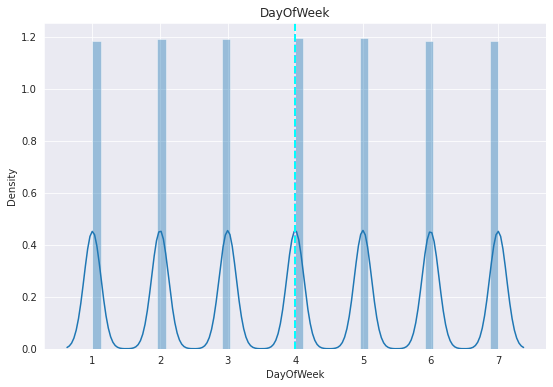

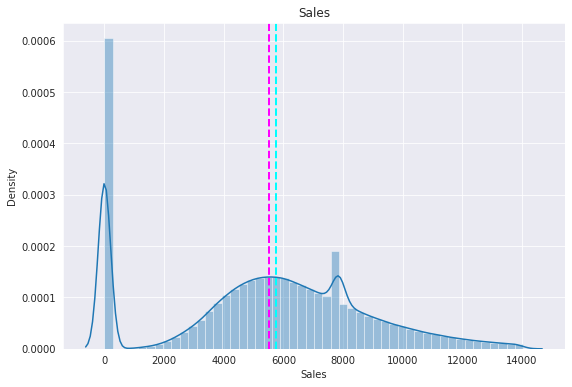

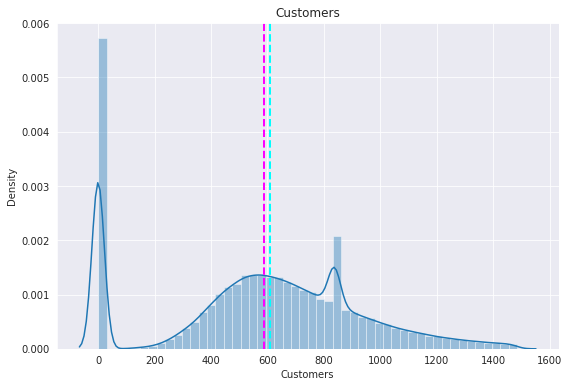

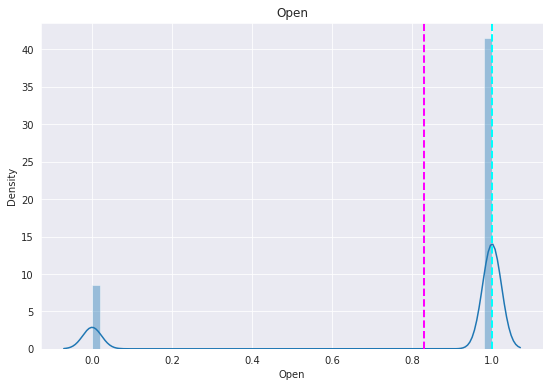

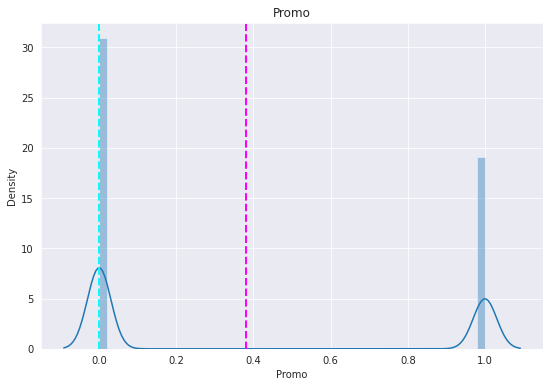

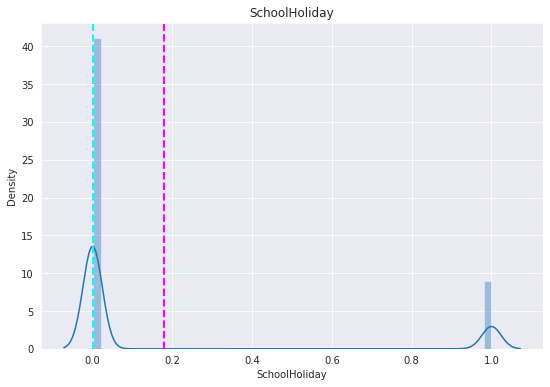

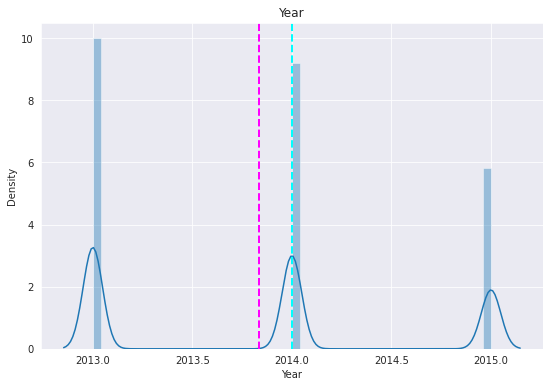

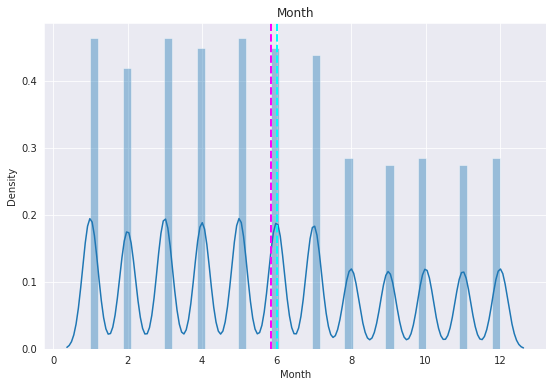

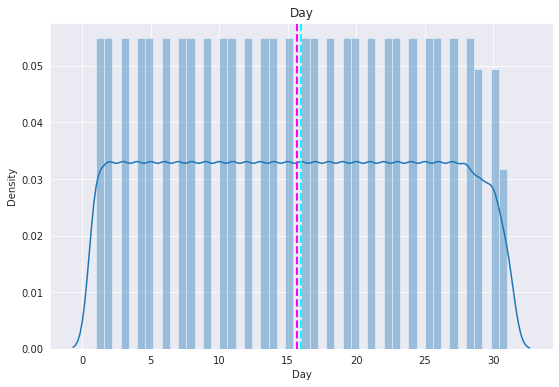

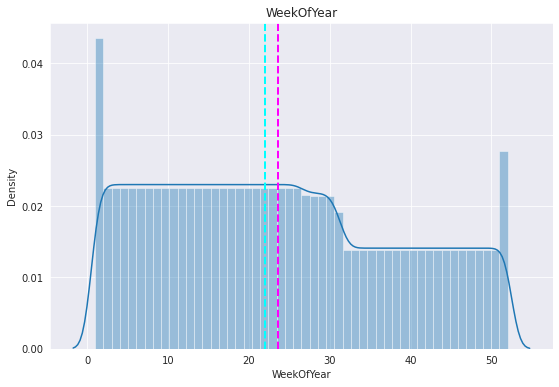

In [406]:
for col in numeric_features[1:-3]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    sns.distplot(feature,bins=50,ax = ax)    
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [407]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Store                1017209 non-null  int64  
 1   DayOfWeek            1017209 non-null  int64  
 2   Sales                1017209 non-null  float64
 3   Customers            1017209 non-null  float64
 4   Open                 1017209 non-null  int64  
 5   Promo                1017209 non-null  int64  
 6   StateHoliday         1017209 non-null  object 
 7   SchoolHoliday        1017209 non-null  int64  
 8   Year                 1017209 non-null  int64  
 9   Month                1017209 non-null  int64  
 10  Day                  1017209 non-null  int64  
 11  WeekOfYear           1017209 non-null  int64  
 12  StoreType            1017209 non-null  object 
 13  Assortment           1017209 non-null  object 
 14  CompetitionDistance  1017209 non-null  float64
 15

The log10() function computes the value of the logarithm of argument x to base 10. The log1p() function computes the value of log(1+x) accurately even for tiny argument x. hence we used it 

### Log transformation

In [479]:
df['CompetitionOpen'] = df['CompetitionOpen'].astype(int)

OverflowError: ignored

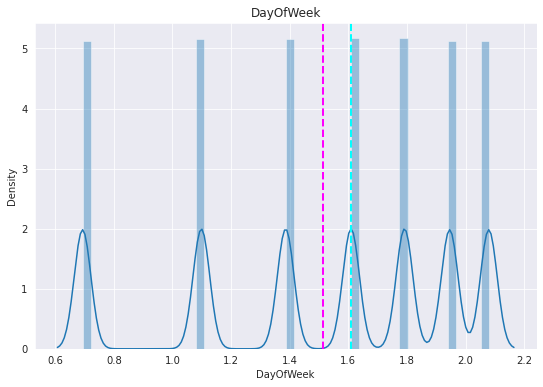

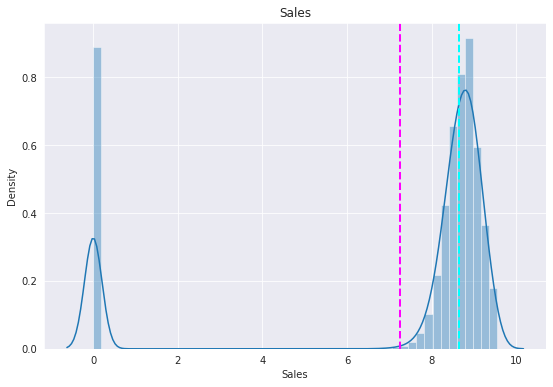

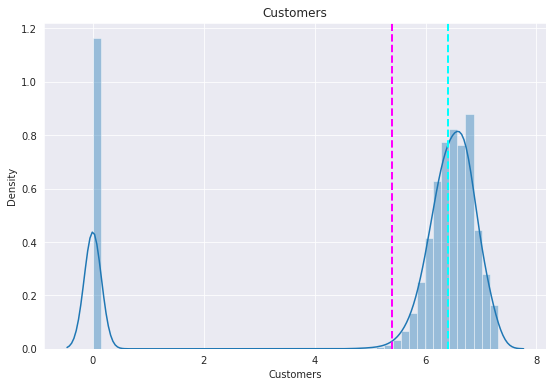

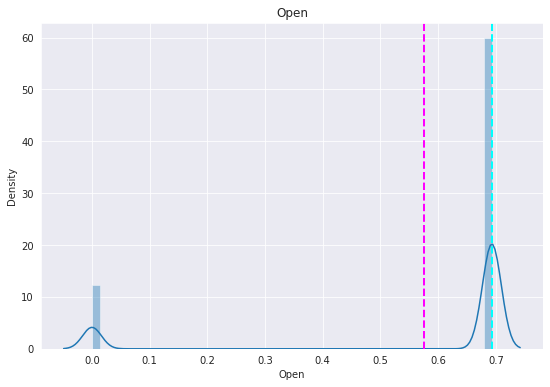

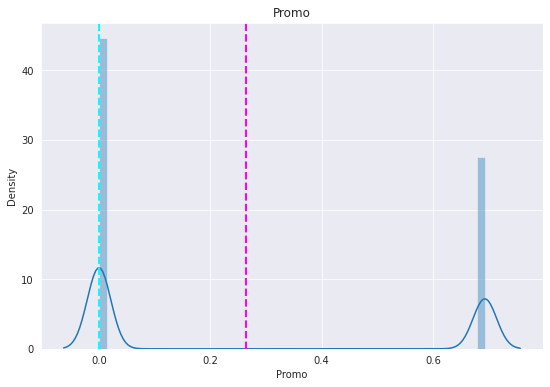

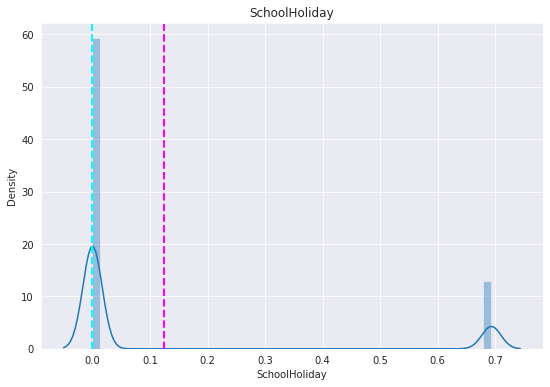

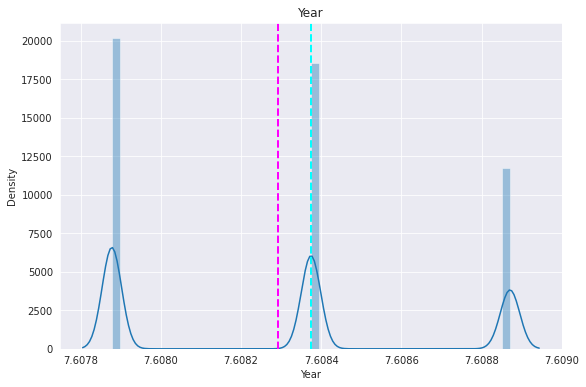

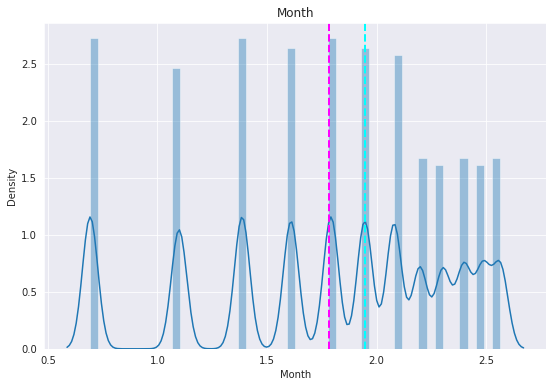

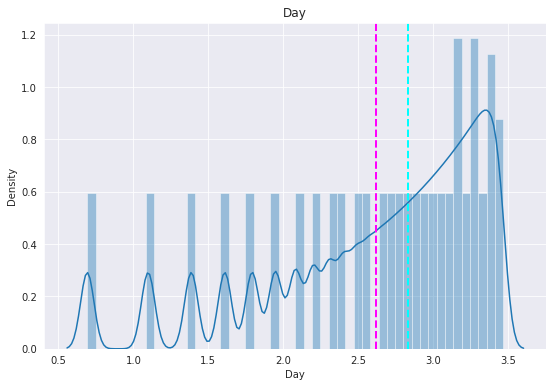

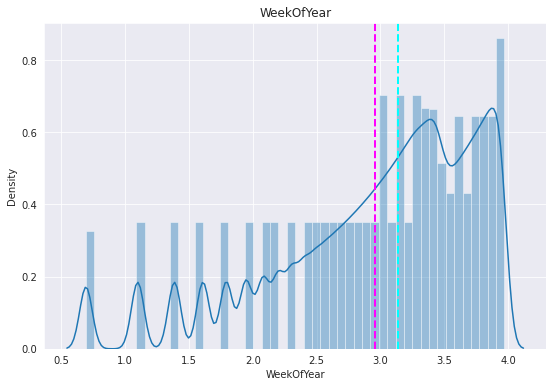

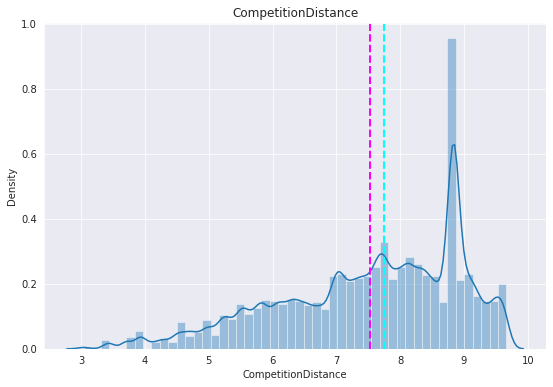

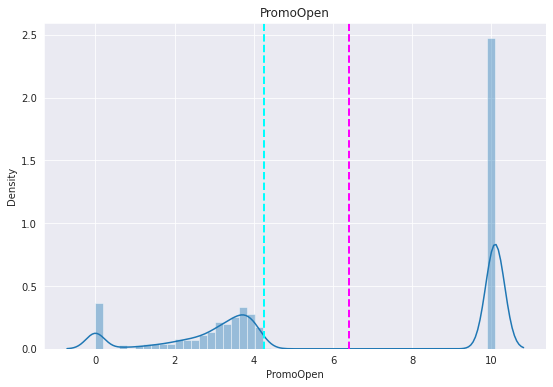

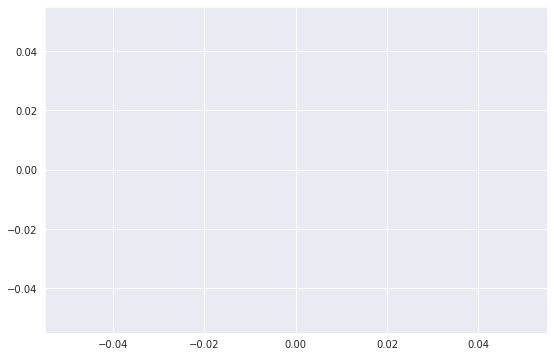

In [478]:
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.log1p(df[col])
    sns.distplot(feature,ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)     
    ax.set_title(col)
plt.show()

**Now our graph is in normal distribution lets proceed.**

In [481]:
df_new.describe().columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear',
       'CompetitionDistance', 'PromoOpen', 'CompetitionOpen', 'StoreType_a',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_a',
       'Assortment_b', 'Assortment_c', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c'],
      dtype='object')

In [ ]:
df_new.info()

### 6. Data Scaling

In [ ]:
# Scaling your data


##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [490]:
# Transform Your data
df_new.Open.value_counts()


1    844392
0    172817
Name: Open, dtype: int64

In [491]:
final_df = df_new[df_new.Open != 0]

In [492]:
final_df.Open.value_counts()

1    844392
Name: Open, dtype: int64

In [493]:
# now open is no more a variable hence we can drop it.
final_df=final_df.drop('Open', axis=1)

In [494]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017207
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Store                           844392 non-null  int64  
 1   DayOfWeek                       844392 non-null  int64  
 2   Sales                           844392 non-null  float64
 3   Customers                       844392 non-null  float64
 4   Promo                           844392 non-null  int64  
 5   SchoolHoliday                   844392 non-null  int64  
 6   Year                            844392 non-null  int64  
 7   Month                           844392 non-null  int64  
 8   Day                             844392 non-null  int64  
 9   WeekOfYear                      844392 non-null  int64  
 10  CompetitionDistance             844392 non-null  float64
 11  PromoOpen                       844392 non-null  int64  
 12  CompetitionOpen

In [488]:
final_df.Customers.value_counts()

837.0    38738
560.0     2414
576.0     2363
603.0     2337
571.0     2330
         ...  
44.0         1
68.0         1
36.0         1
84.0         1
3.0          1
Name: Customers, Length: 1424, dtype: int64

In [ ]:
# after drawing heat map we conclude

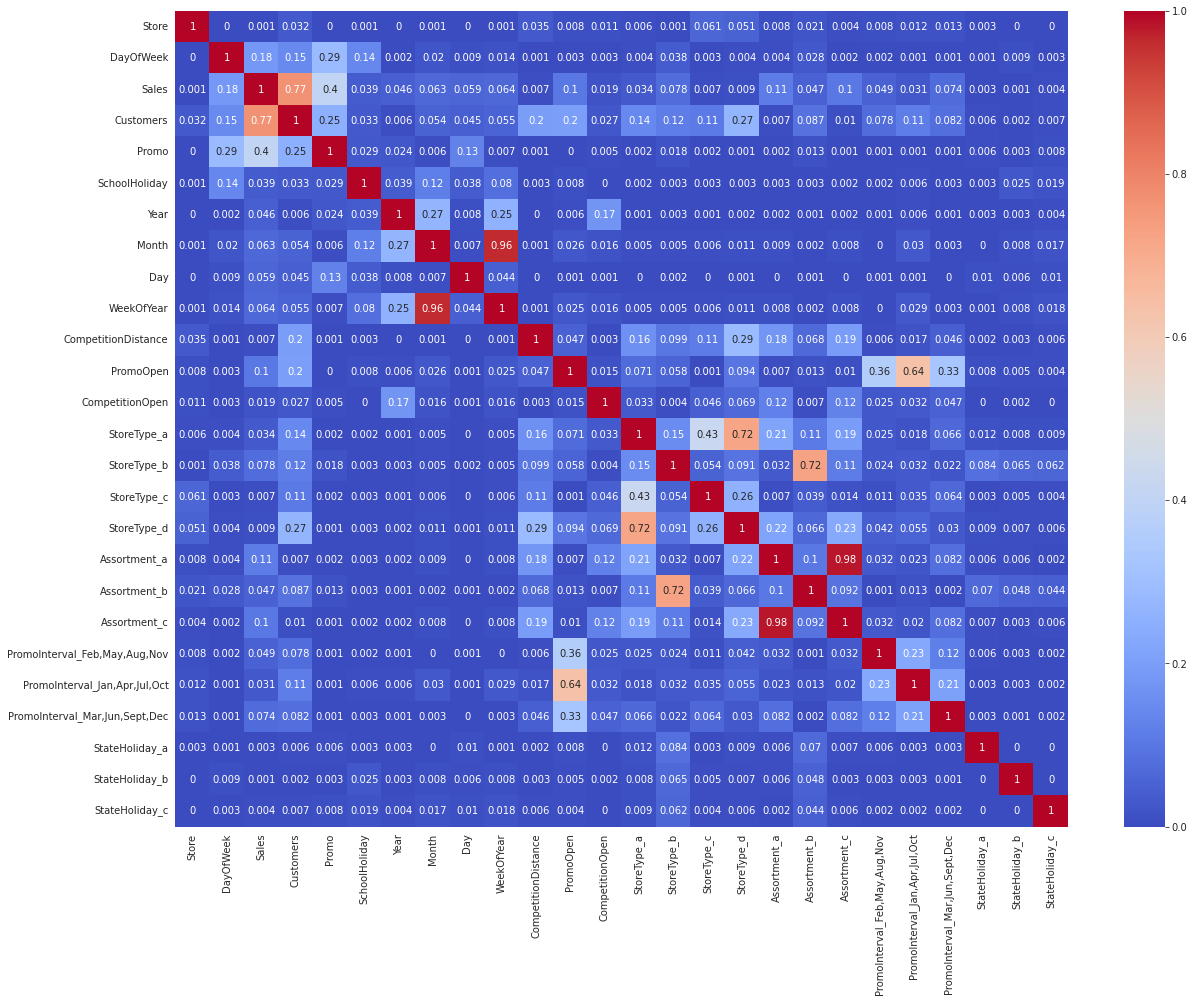

In [500]:
# DImensionality Reduction (If needed)
plt.figure(figsize=(20,15))
correlation = final_df.corr()
sns.heatmap(abs(round(correlation,3)), annot=True, cmap='coolwarm')
plt.show()

In [496]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
final_df.info()

In [498]:
# calculating the vif by excluding the redundant features("Sales -> Dependent variable" and "Store -> ID")
calc_vif(final_df[[i for i in final_df.describe().columns if i not in ["Store", "Sales"]]])

,variables,VIF
0,DayOfWeek,1.123694e+00
1,Customers,1.269696e+00
2,Promo,1.184114e+00
3,SchoolHoliday,1.055667e+00
4,Year,1.629727e+00
5,Month,1.411980e+01
6,Day,1.060238e+00
7,WeekOfYear,1.385728e+01
8,CompetitionDistance,1.161258e+00
9,PromoOpen,9.844545e+05


Assortment_b and storetype_b are highley co related hece we will remove **assortment_b** because it is highley dependent on sale.

Promo_oct and promoOpen Highley dependent to reduce colenearity we will drop promo_oct because PromoOpen is highley dependent on sale.**bold text**

StoreType_a and storetype_d are highley co-related hence we will remove **StoreTye_a** because storeType_d is highley dependent on sale

In [499]:
calc_vif(final_df[[i for i in final_df.describe().columns if i not in ["Store",'PromoInterval_Jan,Apr,Jul,Oct','StoreType_a','Assortment_b', "Sales"]]])

,variables,VIF
0,DayOfWeek,5.810720
1,Customers,11.154310
2,Promo,2.138091
3,SchoolHoliday,1.309018
4,Year,250.021915
5,Month,57.073158
6,Day,4.586063
7,WeekOfYear,51.272158
8,CompetitionDistance,2.332255
9,PromoOpen,2.862213


assortment_a vs **assortment_c**

In [ ]:
calc_vif(final_df[[i for i in final_df.describe().columns if i not in ["Store",'CompetitionOpenSinceYear','Year','Promo2SinceWeek','PromoInterval_Jan,Apr,Jul,Oct','StoreType_d','Assortment_c','Promo2SinceYear', "Sales"]]])

,variables,VIF
0,DayOfWeek,4.694182
1,Customers,8.413728
2,Promo,2.078753
3,SchoolHoliday,1.302857
4,Month,55.547214
5,Day,4.074448
6,WeekOfYear,50.762286
7,CompetitionDistance,2.045423
8,CompetitionOpenSinceMonth,7.066373
9,Promo2,2.642703


Assortment_a highly depend on sale than b  remove **Assortment_b** same goes with **StoreType_c**, **Month**

In [ ]:
calc_vif(final_df[[i for i in final_df.describe().columns if i not in ["Store",'CompetitionOpenSinceMonth','Month','Assortment_b','StoreType_c','CompetitionOpenSinceYear','Year','Promo2SinceWeek','PromoInterval_Jan,Apr,Jul,Oct','StoreType_d','Assortment_c','Promo2SinceYear', "Sales"]]])

,variables,VIF
0,DayOfWeek,2.898015
1,Customers,6.524294
2,Promo,2.069967
3,SchoolHoliday,1.262704
4,Day,3.492595
5,WeekOfYear,3.293170
6,CompetitionDistance,1.886896
7,Promo2,2.584586
8,StoreType_a,2.399839
9,StoreType_b,1.095102


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

In [ ]:
independent_variable = ['DayOfWeek','Promo','SchoolHoliday','Day','WeekOfYear','stateholiday','PromoInterval_Mar,Jun,Sept,Dec','PromoInterval_Feb,May,Aug,Nov','Assortment_a','CompetitionDistance','Promo2','StoreType_a','StoreType_b']

In [ ]:
# numerical_cols = ['Customers','CompetitionDistance','Year','Month','DayOfWeek','Day','CompetitionOpen','PromoOpen']
# scaler = MinMaxScaler()
# scaler.fit(final_df[independent_variable])
# final_df[independent_variable]  = scaler.transform(final_df[independent_variable])

In [ ]:
# data scaling 
# from scipy.stats import zscore
# X = final_df[independent_variable].apply(zscore)

In [ ]:
X = final_df[independent_variable]

In [ ]:
X

,DayOfWeek,CompetitionOpenSinceMonth,Promo,SchoolHoliday,Day,WeekOfYear,stateholiday,"PromoInterval_Mar,Jun,Sept,Dec","PromoInterval_Feb,May,Aug,Nov",Assortment_a,CompetitionDistance,CompetitionOpenSinceMonth,Promo2,StoreType_a,StoreType_b
0,0.666667,0.727273,1.0,1.0,1.000000,0.588235,0.0,0.0,0.0,1.0,0.079365,0.727273,0.0,0.0,0.0
1,0.500000,0.727273,1.0,1.0,0.966667,0.588235,0.0,0.0,0.0,1.0,0.079365,0.727273,0.0,0.0,0.0
2,0.333333,0.727273,1.0,1.0,0.933333,0.588235,0.0,0.0,0.0,1.0,0.079365,0.727273,0.0,0.0,0.0
3,0.166667,0.727273,1.0,1.0,0.900000,0.588235,0.0,0.0,0.0,1.0,0.079365,0.727273,0.0,0.0,0.0
4,0.000000,0.727273,1.0,1.0,0.866667,0.588235,0.0,0.0,0.0,1.0,0.079365,0.727273,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017202,0.000000,0.727273,1.0,1.0,0.200000,0.019608,0.0,1.0,0.0,0.0,0.338413,0.727273,1.0,0.0,0.0
1017204,0.833333,0.727273,0.0,1.0,0.133333,0.000000,0.0,1.0,0.0,0.0,0.338413,0.727273,1.0,0.0,0.0
1017205,0.666667,0.727273,0.0,1.0,0.100000,0.000000,0.0,1.0,0.0,0.0,0.338413,0.727273,1.0,0.0,0.0
1017206,0.500000,0.727273,0.0,1.0,0.066667,0.000000,0.0,1.0,0.0,0.0,0.338413,0.727273,1.0,0.0,0.0


### 8. Data Splitting

DayOfWeek	Customers	
Promo2
SchoolHoliday
Day	
5	WeekOfYear	3.563798
6	CompetitionDistance	1.994610
7	CompetitionOpenSinceMonth	7.005270
8	Promo2	2.635773
9	StoreType_a	2.412983
10	StoreType_b	1.095444
11	Assortment_a	2.184390
12	PromoInterval_Feb,May,Aug,Nov	1.414761
13	PromoInterval_Mar,Jun,Sept,Dec	1.355104
14	stateholiday

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
y = final_df['Sales']

##### What data splitting ratio have you used and why? 

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(675513, 13)
(168879, 13)


What data splitting ratio have you used and why?
1. training set - 80%
2. test set - 20%

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 675513 entries, 339825 to 368429
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   DayOfWeek                       675513 non-null  float64
 1   Promo                           675513 non-null  float64
 2   SchoolHoliday                   675513 non-null  float64
 3   Day                             675513 non-null  float64
 4   WeekOfYear                      675513 non-null  float64
 5   stateholiday                    675513 non-null  float64
 6   PromoInterval_Mar,Jun,Sept,Dec  675513 non-null  float64
 7   PromoInterval_Feb,May,Aug,Nov   675513 non-null  float64
 8   Assortment_a                    675513 non-null  float64
 9   CompetitionDistance             675513 non-null  float64
 10  Promo2                          675513 non-null  float64
 11  StoreType_a                     675513 non-null  float64
 12  StoreType_b

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 Linear regression

In [ ]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

# Fit the Algorithm

# Predict on the model

In [ ]:
reg.score(X_train,y_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your df prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***